In [1]:
import musif

In [2]:
print(musif.__version__)

1.2


In [3]:
import urllib.request
import zipfile
from pathlib import Path

data_dir = Path("data")
dataset_path = "dataset.zip"
urllib.request.urlretrieve("https://zenodo.org/record/4027957/files/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0.zip?download=1", dataset_path)
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)
    

In [4]:
from musif.config import ExtractConfiguration


In [5]:
import glob

config = ExtractConfiguration(
    None,
    musescore_dir="data",
    basic_modules=["scoring"],
    features=["jsymbolic"],
)

In [6]:
from musif.extract.extract import FeaturesExtractor

extractor = FeaturesExtractor(config)

In [7]:
extractor = FeaturesExtractor(
    None,
    musescore_dir="data",
    basic_modules=["scoring"],
    features=["core", "ambitus", "melody", "tempo", 
              "density", "texture", "lyrics", "scale", 
              "key", "dynamics", "rhytm"]
)

In [8]:
import musif.musescore.constants as musescore_c
musescore_c.MUSESCORE_FILE_EXTENSION = '.mid'

In [9]:
# from musif.extract.extract import FeaturesExtractor

# extractor = FeaturesExtractor(config)

In [10]:
# extrac = FeaturesExtractor(
#     ExtractConfiguration('/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/config_extraction_example.yml'),
#     xml_dir = '/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/data/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0/MIDI',
#     musescore_dir = '/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/data/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0/MIDI/Ib_noPen',
# ).extract()

In [11]:
df = extractor.extract()

  0%|          | 0/175 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
df

,FamilyWw_Density,FamilyWw_Notes,FamilyWw_NotesMean,FamilyWw_NumberOfFilteredParts,FamilyWw_NumberOfParts,FamilyWw_SoundingDensity,FamilyWw_SoundingMeasures,FamilyWw_SoundingMeasuresMean,FileName,Id,...,Score_StepwiseMotionDesc_Per,Score_TrimmedAbsoluteIntervallicMean,Score_TrimmedAbsoluteIntervallicStd,Score_TrimmedIntervallicMean,Score_TrimmedIntervallicStd,Scoring,TimeSignature,TimeSignatureGrouped,Voices,WindowId
0,0.619932,367,91.75,4,4,0.660072,278,69.5,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,0,...,0.239669,1.539519,1.316425,-0.113402,1.468171,"flI,flII,flII,flII",2/1,other,,0
1,0.872024,586,146.5,4,4,1.069343,274,68.5,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,1,...,0.273196,1.761803,1.161396,-0.165236,1.616888,"flI,flII,flII,flII",2/1,other,,0
2,0.974593,959,239.75,4,4,1.175245,408,102.0,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,2,...,0.326702,1.816993,0.848204,-0.103268,1.616436,"flI,flII,flII,flIII",2/1,other,,0
3,0.736979,566,141.5,4,4,0.887147,319,79.75,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,3,...,0.259786,1.746667,1.213919,-0.095556,1.564105,"flI,flII,flII,flII",2/1,other,,0
4,0.957692,498,124.5,4,4,1.10177,226,56.5,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,4,...,0.293522,1.825758,1.006265,-0.073232,1.619699,"flI,flII,flIII,flIII",2/1,other,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1.070513,668,167.0,4,4,1.265152,264,66.0,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,170,...,0.34488,1.853383,0.971941,-0.110902,1.629415,"flI,flII,flII,flII",2/1,other,,0
171,1.125,729,182.25,4,4,1.285714,189,47.25,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,171,...,0.291034,2.041308,0.881058,0.02926,1.76039,"flI,flI,flI,flI",3/1,other,,0
172,0.913306,453,113.25,4,4,1.198413,189,47.25,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,172,...,0.336303,1.734072,0.875127,-0.049861,1.546242,"flI,flI,flI,flI",2/1,other,,0
173,0.904412,369,92.25,4,4,1.111446,166,41.5,/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/MUSIF...,173,...,0.342466,1.761092,0.746497,-0.051195,1.598028,"flI,flII,flII,flII",2/1,other,,0


In [ ]:
from musif.process.processor import DataProcessor

processed_df = DataProcessor(df, None).process().data

# with `.shape` you can see the number of rows and columns of the dataframe
processed_df.shape


Post-processing data...


(175, 561)

In [ ]:
processed_df.dropna(axis=1, inplace=True)
processed_df.shape

(175, 561)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

# removing FileName and Id
if 'FileName' in processed_df:
    del processed_df['FileName']
if 'Id' in processed_df:
    del processed_df['Id']

preprocessor = make_pipeline(
    OrdinalEncoder(), # give a cardinal number to features that are categories
    StandardScaler(), # subtract the mean and scale between -1 and +1
)

model = make_pipeline(
    preprocessor,
    MLPRegressor(    
        hidden_layer_sizes=(128, 32, 8, 2, 8, 32, 128, 396), # the output size is the same as the number of features
        activation="relu",
        solver="lbfgs",
        max_iter=100,
        tol=0.1,
        random_state=934,
        max_fun=10**6
        # shuffle=True  
    )
)

y_true = preprocessor.fit_transform(processed_df)
# the next call will take some time...
model.fit(processed_df, y_true)
y_hat = model.predict(processed_df)
print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_hat)}")

Mean Absolute Error: 0.5385324852364026


/Users/ivansimo/anaconda3/envs/ICCMU/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mlpclassifier = model['mlpregressor']

def mytransform_method(X):
    activations = [None for _ in range(mlpclassifier.n_layers_)]
    activations[0] = X
    X = mlpclassifier._forward_pass(activations)[-6]
    return MinMaxScaler().fit_transform(X)

mlpclassifier.transform = mytransform_method

learned_features = model.transform(processed_df)

learned_features.shape

(175, 2)

<Axes: >

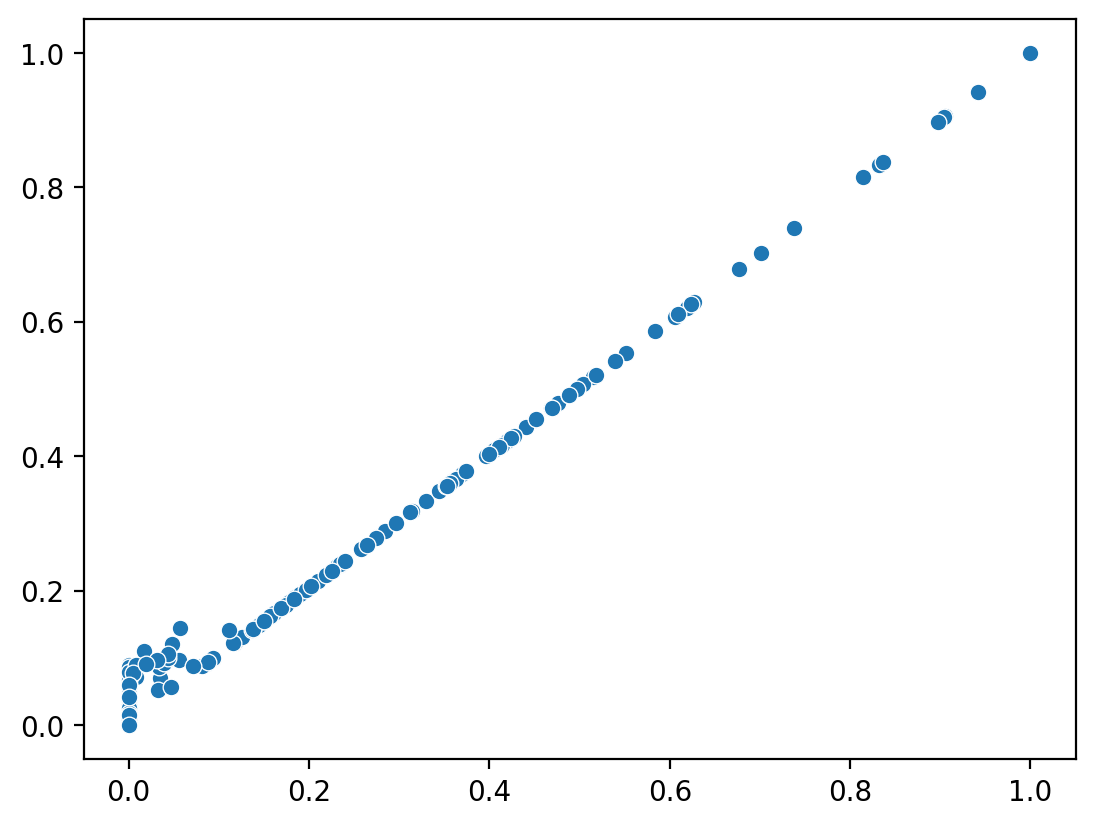

In [ ]:
import seaborn
seaborn.scatterplot(x=learned_features[:, 0], y=learned_features[:, 1])

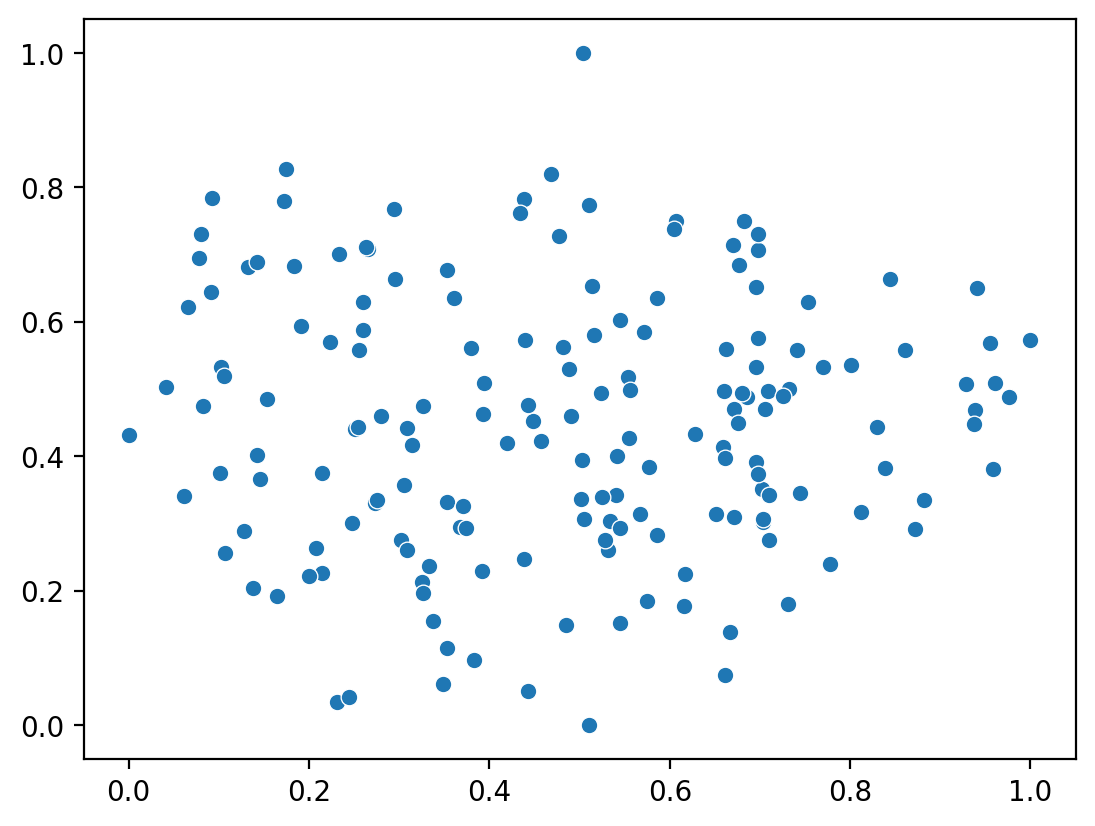

In [ ]:
from sklearn.decomposition import PCA

pca_pipeline = make_pipeline(
    preprocessor, PCA(2), MinMaxScaler()
)
data_pca = pca_pipeline.fit_transform(processed_df)
ax = seaborn.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1])

In [ ]:
# extrac = FeaturesExtractor(
#     ExtractConfiguration('/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/config_extraction_example.yml'),
#     xml_dir = '/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/data/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0/MIDI',
#     musescore_dir = '/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/data/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0/MIDI/Ib_noPen',
# ).extract()

In [ ]:
#  config = ExtractConfiguration(
     # None,
     # musescore_dir="/Users/ivansimo/Desktop/ICCMU/ICCMU_CODE/musicXXI/MUSIF/data/AnatomyComposerAttributionMIDIFilesAndFeatureData_1_0/MIDI/Ib_noPen",
     # mscore_exec="/Applications/MuseScore 4.app/Contents/MacOS/mscore",
#  )